# <center>**Customer Churn Prediction for an American Bank**</center>
<p style="text-align: right;">By: Vedansh Chauhan</p>

### Contents:
- [Introduction](#welcome)
- [Stage 1: Data Acquisition](#acq)
- [Stage 2: Data Pre-processing](#pre)
- [Stage 4: Model Building and Training](#build)
- [Stage 5: Model Testing](#test)
- [Conclusion](#bye)


Customer churn is when customers decide to stop using a service, and it can be a real bummer for businesses, especially banks. For banks, churn happens when people close their accounts or switch to a rival, and it can mean a loss of revenue. But hey, there’s a project called the Customer Churn Prediction project that’s trying to help banks predict when customers are likely to leave. It uses machine learning to analyze all sorts of data, like account activity, transaction history, and customer demographics, and can spot patterns that signal when a customer might churn.

# Stage 1: DATA ACQUISITION <a id="acq"></a>
#### Objectives:
- Importing the necessary libraries
- Importing the dataset

### Importing the libraries

In [ ]:
#Basic Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.decomposition import PCA

#Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

### Importing the dataset

In [8]:
cust = pd.read_csv('/Users/vedanshchn/Documents/Projects/Churn/Churn_Modelling.csv')

In [10]:
cust.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
cust.shape

(10000, 14)

<center><b><h3>DATA DICTIONARY</h3></b></center>

|Serial No.|Column Name|Explanation|
|-|-|-|
| 1 | RowNumber | A unique identifier for each record. |
| 2 | CustomerId | The unique ID assigned to each customer. |
| 3 | Surname | The customer's last name. |
| 4 | CreditScore | The customer's credit score, representing their financial reliability. |
| 5 | Geography | The geographical location of the customer (e.g., country or region). |
| 6 | Gender | The customer's gender. |
| 7 | Age | The customer's age. |
| 8 | Tenure | The number of years the customer has been with the company. |
| 9 | Balance | The customer's account balance. |
| 10 | NumOfProducts | The number of products the customer has with the company. |
| 11 | HasCrCard | Indicates whether the customer has a credit card (1 = Yes, 0 = No). |
| 12 | IsActiveMember | Indicates whether the customer is an active member (1 = Yes, 0 = No). |
| 13 | EstimatedSalary | The customer's estimated annual salary. |
| 14 | Exited | Whether the customer has left the service (1 = Churned/Exited, 0 = Stayed). |

<center> Note: 'Exited' is the target column. </center>

In [16]:
#Data types of each column.
cust.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
#A concise summary of the data.
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Stage 2: DATA PREPROCESSING <a id="pre"></a>
#### Objectives:
- Duplicate Records Elimination
- Imputation: Handling Missing Values
- Removing Unnecessary Columns
- Categorical Column Encoding
- Train-Test Split
- Outlier Detection and Elimination
- Handling Skewness
- Feature Scaling
- Feature Selection:
  - Correlation Analysis
  - Mutual Information
- Target Column Balancing
- Dimensionality Reduction

### Duplicate Records Elimination

In [22]:
print(f"There are {cust.duplicated().sum()} duplicates in the data.")

There are 0 duplicates in the data.


### Imputation

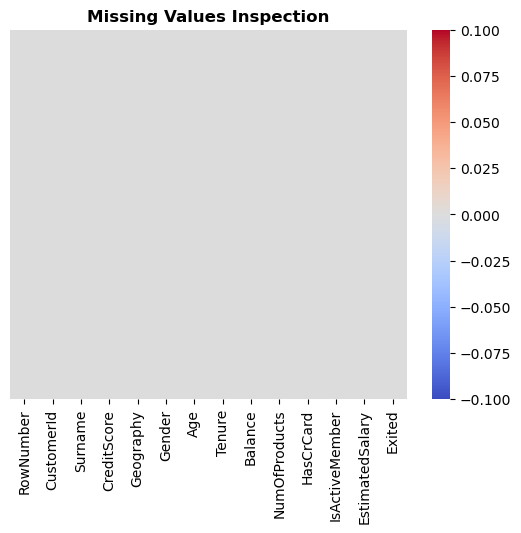

In [25]:
#Inspecting the missing values
sns.heatmap(cust.isna(), yticklabels=False, cmap='coolwarm')
plt.title("Missing Values Inspection", fontweight='bold')
plt.show()

*There are no null values in the data. Hence, imputation isn't necessary.*

### Removing Unnecessary Columns
The columns 'RowNumber', 'CustomerId', 'Surname' are unique to each row or customer and hence add no value to the analysis. I'll remove them from the further analysis.

In [29]:
cust = cust.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

### Categorical Column Encoding
I'll use Dictionary Mapping to encode the categorical columns in the data.

#### The 'Geography' column.

In [33]:
cust['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [35]:
#Creating a dictionary map.
geo_map = {'France': -1,
           'Spain': 0,
           'Germany': 1
           }

In [37]:
#Applying the map.
cust['Geography_encoded'] = cust['Geography'].map(geo_map)

#### The 'Gender' column.

In [40]:
cust['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [42]:
#Creating a dictionary map.
gen_map = {'Female': 0,
           'Male': 1
           }

In [44]:
#Applying the map.
cust['Gender_encoded'] = cust['Gender'].map(gen_map)

In [46]:
#Remving the earlier columns.
cust = cust.drop(['Geography', 'Gender'], axis=1)

*Categorical Column Encoding is successful and the whole data is now in a numerical form.* ◡̈

### Train-Test Split
Before proceeding with the further steps, I'll split the data into train and test splits to avoid data leakage.

In [50]:
X = cust.drop('Exited', axis=1)
y = cust['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, stratify=y, random_state=42)

### Outlier Detection and Elimination

In [53]:
continious_val_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

X_train[continious_val_cols].describe()

,CreditScore,Age,Balance,EstimatedSalary
count,9000.000000,9000.000000,9000.000000,9000.000000
mean,650.805444,38.930333,76472.054947,99552.115873
std,96.640047,10.494620,62352.647081,57394.880195
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,50566.127500
50%,652.000000,37.000000,97262.675000,99387.815000
75%,718.000000,44.000000,127685.682500,148527.730000
max,850.000000,92.000000,238387.560000,199992.480000


#### Observations:
- **Central Tendency:** The values of Mean and Median (the '50%' row) are quite close to one another for most columns, which suggests a slight to no skewness of the distribution of the data.
- **Dispersion:** The Standard Deviation for the columns indicates a greater variance due to the high values.
- **Minimum and Maximum Values:** There's a high variation in the minimum and maximum values of all the columns, which indicates a difference in scales.

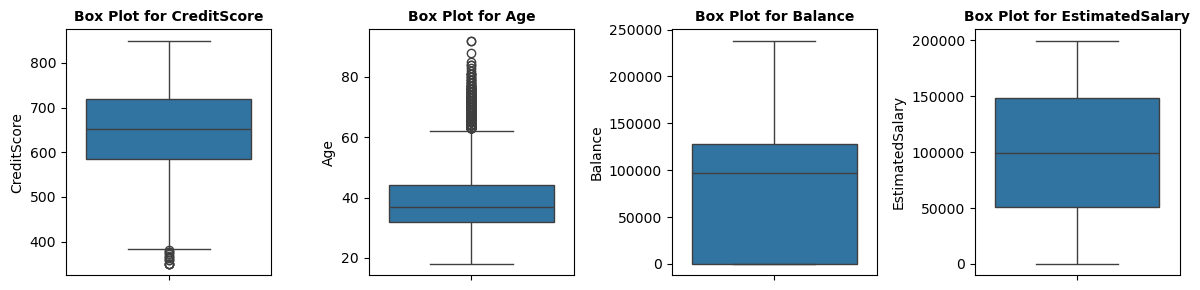

In [56]:
#Generating a figure and grid of axes within the figure.
ncols = 4
nrows = int(len(X_train[continious_val_cols].columns) / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(12,3))

#Subplots.
for i, col in enumerate(X_train[continious_val_cols].columns): #Looping through data.
  ax=axes[i]
  sns.boxplot(data=X_train[continious_val_cols][col], ax=ax)
  ax.set_title(f"Box Plot for {col}", fontweight='bold', size=10)

plt.tight_layout()
plt.show()

#### Observation:
The 'CreditScore' and 'Age' columns appear to have outlier values.
#### Next Step:
I'll use **Interquartile Range (IQR)** for capping the outliers.

In [58]:
outlier_cols = X_train[['CreditScore', 'Age']]

#IQR.
for i in outlier_cols:

  #Calculating the IQR.
  q1 = X_train[i].quantile(0.25) #25th percentile.
  q3 = X_train[i].quantile(0.75) #75th percentile.
  iqr = q3-q1

  #Threshold.
  upper_bound = q3+(iqr*1.5)
  lower_bound = q1-(iqr*1.5)

  #Capping the outliers.
  X_train[col] = np.clip(X_train[i], lower_bound, upper_bound)
  X_test[col] = np.clip(X_test[i], lower_bound, upper_bound) #Test Set.

*Outlier capping is successful.* ◡̈

### Handling Skewness
I'll inspect the skewness of the continuous columns by plotting histograms them.

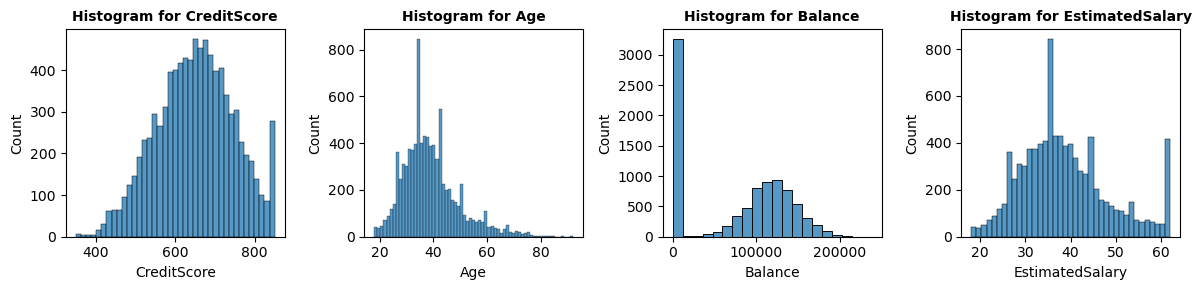

In [63]:
#Generating a figure and grid of axes within the figure
fig, axes= plt.subplots(nrows, ncols, figsize=(12,3))

#Subplots.
for i, col in enumerate(X_train[continious_val_cols].columns): #Looping through data.
  ax=axes[i]
  sns.histplot(data=X_train[continious_val_cols][col], ax=ax)
  ax.set_title(f"Histogram for {col}", fontweight='bold', size=10)

#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations:
- The 'CreditScore' column appear to be almost normally distributed.
- The 'Age' and 'Balance' columns appears to be right skewed.
- The 'EstimatedSalary' column appears to be almost uniform. i.e., not skewed.
#### Next Step:
I'll use **Yeo-Johnson Transformation** to handle the skewed data.

In [65]:
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

#Initializing the transformer.
yj_transformer = PowerTransformer(method='yeo-johnson')

#Applying the transformer.
X_train_transformed[continious_val_cols] = yj_transformer.fit_transform(X_train[continious_val_cols])
X_test_transformed[continious_val_cols] = yj_transformer.transform(X_test[continious_val_cols]) #Test Set.

*The skewed data has been delth with* ◡̈

### Feature Scaling
I'll use **Standard Scaler** to bring the columns in the data to a similar scale.

In [70]:
X_train_scaled = X_train_transformed.copy()
X_test_scaled = X_test_transformed.copy()

#Initializing the scaler.
scaler = StandardScaler()

#Scaling the continious columns.
X_train_scaled[continious_val_cols] = scaler.fit_transform(X_train[continious_val_cols])
X_test_scaled[continious_val_cols] = scaler.transform(X_test[continious_val_cols])

*The Feature Scaling process is successful* ◡̈

### Feature Selection
I'll use **Correlation Analysis** for feature selection.

#### Correlation Analysis

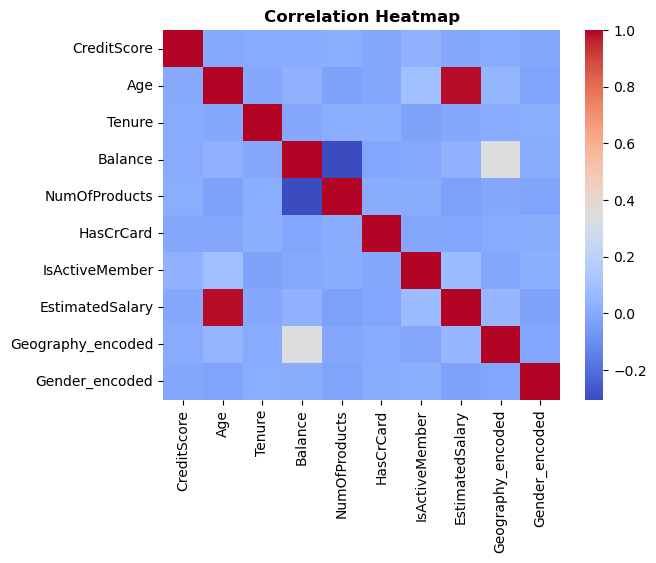

In [75]:
#Correlation Analysis.
sns.heatmap(X_train_scaled.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap', fontweight='bold')
plt.show()

#### Observations and Opinions:
- The “Age” and “EstimatedSalary” columns might be strongly positively correlated but still represent independent or different information.
- The "Balance" and "NumOfProducts" are strongly negatively correlated.
- The Correlation Analysis alone doesn't seem to be enough to make a decision on which columns should be retained.
#### Next Step:
I'll use **Mutual Information (MI)** for further inspecting the relevancy of the columns.

#### Mutual Information

In [79]:
#Calculating MI and storing it in a Pandas Series in descending order.
mutual_info = pd.Series(mutual_info_classif(X_train_scaled, y_train, random_state=25), index=X_train_scaled.columns).sort_values(ascending=False)

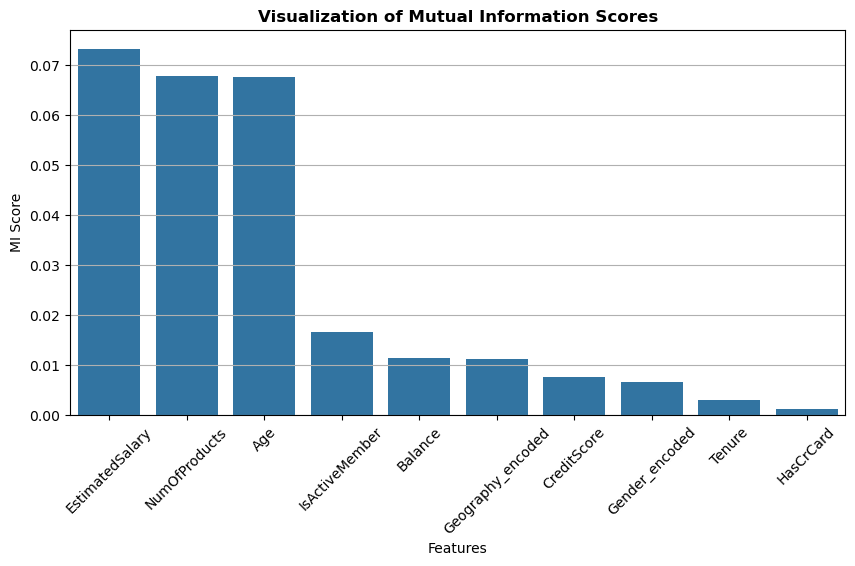

In [80]:
#Bar Plot.
plt.figure(figsize=(10,5))
sns.barplot(mutual_info)
plt.title('Visualization of Mutual Information Scores', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('MI Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Upon analyzing the Correlation Heatmap and the bar chart of Mutual Information Scores, I concluded the following:
- Although the “Age” and “EstimatedSalary” are strongly positively correlated, they represent different types of information and earned high Mutual Information scores. Hence, I’ll retain them both for further analysis.
- Even though “Balance” and “NumOfProducts” are strongly negatively correlated, the former has a relatively low Mutual Information score. I’ll remove it from further analysis.

In [83]:
#Removing the 'Balance' column from further analysis.
X_train_selected = X_train_scaled.drop('Balance', axis=1)
X_test_selected = X_test_scaled.drop('Balance', axis=1) #Test Set.

*The Feature Selection process has been concluded* ◡̈

### Target Column Balancing
I'll inspect the target column to see if the classes are imbalanced, and if so, I'll try to balance them out.

In [88]:
y_train.value_counts()

Exited
0    7167
1    1833
Name: count, dtype: int64

#### Observation:
Class **'1'** is under-represented in the data.


I'll use **Borderline Synthetic Minority Over-sampling Technique** in order to tackle the class inbalance.

In [91]:
#Initializing and applying Borderline SMOTE.
bsmote = BorderlineSMOTE(random_state=25)
X_train_bal, y_train_bal = bsmote.fit_resample(X_train_selected, y_train)

In [93]:
#Inspecting the count of classes after sampling.
y_train_bal.value_counts()

Exited
0    7167
1    7167
Name: count, dtype: int64

*The classes in the target column have been successfully balanced.* ◡̈

### Dimensionality Reduction
I'll use **Principal Component Analysis (PCA)** for optimizing the data for the ML algorithms.

In [97]:
#Initializing and applying PCA.
pca = PCA(random_state=25).fit(X_train_bal)

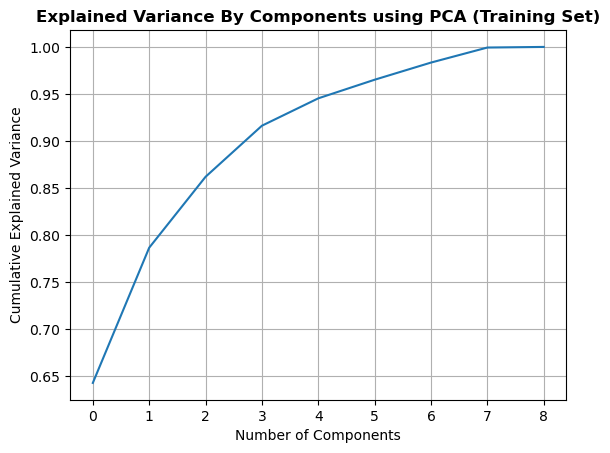

In [99]:
#Plotting the explained variance ratio for each component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance By Components using PCA (Training Set)', fontweight='bold')
plt.grid()
plt.show()

#### Observation:
The elbow point in the plot occurs at approximately 0.90 (90%) cumulative explained variance.
#### Next Step:
I will retain 90% of the information using PCA.

In [102]:
#Re-initializing and applying PCA.
pca = PCA(n_components=0.91)
X_train_pca = pca.fit_transform(X_train_bal)
X_test_pca = pca.transform(X_test_selected) #Test Set.

#Explained variance and number of components.
print(f"Explained Variance: {np.sum(pca.explained_variance_ratio_):.2f}")
print(f"Number of components included: {len(pca.components_)}")

Explained Variance: 0.92
Number of components included: 4


The Dimensionality Reduction process has been successfully completed! ◡̈

# Stage 4: MODEL BUILDING AND TRAINING <a id="section-five"></a>
#### Objectives:
- Determining a Scoring Metric for Model Building
- Model Building:
    - Splitting the data into train and validation sets
    - Cross Validation
    - Hyperparameter Tuning
    - Training the model
    - Calculating and setting optimal Threshold values
- Model Evaluation:
    - Confusion Matrix
    - Receiver Operating Characteristic (ROC) Curve
    - Precision Recall Curve

### Determining a Scoring Metric for Model Building
- The positive class (1) represents a churned/exited customer, while the negative class (0) represents a customer who has stayed.

- It's important to minimize instances where the positive class gets incorrectly classified as negative, as minimizing positive cases is paramount.

- Hence, the ML algorithms must focus on minimizing False Negatives (positive class incorrectly classified as negative), for which **recall will be my choice of the primary scoring metric**.



### Function for Model Building

In [155]:
#Model building, training and evaluation
def train_eval_model(model, parameters, X, y):
    #Training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

    #Cross-validation
    cv_rs = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=45)

    #Hyperparameter Tuning
    param_search = RandomizedSearchCV(model, parameters, cv=cv_rs, scoring='recall', n_jobs=-1)

    #Training the model
    param_search.fit(X_train, y_train)
    tuned_model = param_search.best_estimator_
    print(f"Parameters selected by RandomizedSearchCV are:\n{tuned_model}")

    #Predictions
    y_train_pred = tuned_model.predict(X_train)
    y_val_pred = tuned_model.predict(X_val)
    y_val_prob = tuned_model.predict_proba(X_val)[:, 1]

    #Statistical Results for Training Set
    print("\n")
    print("TRAINING SET RESULTS:")
    print("\n")
    print(f"Classification Report:\n{metrics.classification_report(y_train, y_train_pred)}")
    print("." * 55)
    print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}")
    print(f"Precision: {metrics.precision_score(y_train, y_train_pred):.2f}")
    print(f"Recall: {metrics.recall_score(y_train, y_train_pred):.2f}")
    print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_train, y_train_pred):.2f}")
    print("." * 55)
    print("\n")

    #Statistical Results for Validation Set
    print("VALIDATION SET RESULTS:")
    print("\n")
    print(f"Classification Report:\n{metrics.classification_report(y_val, y_val_pred)}")
    print("." * 55)
    print(f"Accuracy: {metrics.accuracy_score(y_val, y_val_pred):.2f}")
    print(f"Precision: {metrics.precision_score(y_val, y_val_pred):.2f}")
    print(f"Recall: {metrics.recall_score(y_val, y_val_pred):.2f}")
    print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_val, y_val_pred):.2f}")
    print("." * 55)
    print("\n")

    return tuned_model, y_val, y_val_pred, y_val_prob

### Function for Model Evaluation

In [111]:
#Model evaluation
def evaluate_model(tuned_model, y_val, y_val_pred, y_val_prob):

    #Confusion Matrix
    cm = metrics.confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(5,5))
    cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_plot.plot()
    plt.title(f'Confusion Matrix for {type(tuned_model).__name__}', fontweight='bold')
    plt.show()

    print("." * 55)

    #Receiver Operating Characteristic (ROC) Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob)
    roc_auc = metrics.auc(fpr, tpr) ##Calculating Area Under The ROC Curve (AUC)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--') #Reference line
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {type(tuned_model).__name__}', fontweight='bold')
    plt.legend(loc='best')
    plt.show()
    print("Note for AUC: A higher AUC indicates better performance.")
    '''
    Average recall will provide a balanced evaluation by considering the performance on each class equally.
    '''
    print("." * 55)

    #Calculating Average Recall (AR)
    average_recall = metrics.recall_score(y_val, y_val_pred, average='macro') #Macro-average recall treats each class equally.
    #{Average recall will provide a balanced evaluation by considering the performance on each class equally unlike Accuracy in this case.}

    #Precision-Recall Curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_val, y_val_prob)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, color='purple', lw=2, label=f"Precision-Recall curve (Average Recall: {average_recall:.2f})")
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle="--") #Reference Line
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {type(tuned_model).__name__}', fontweight='bold')
    plt.legend(loc='best')
    plt.show()
    print("Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall")

    return None

### Implementing the models
Variables to be used:
- X: "X_train_pca"
- y: "y_train_bal"

#### Logistic Regression Classifier

In [115]:
lr = LogisticRegression()
lr_params= {
    'max_iter': [1000, 1500, 2000],
    'penalty': ['l2'],
    'C':[0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'random_state': [42],
}

tuned_lr, y_val_lr, y_val_pred_lr, y_val_prob_lr = train_eval_model(lr, lr_params, X_train_pca, y_train_bal)

Parameters selected by RandomizedSearchCV are:
LogisticRegression(C=1, max_iter=1000, random_state=42, solver='liblinear')


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68      5733
           1       0.69      0.66      0.67      5734

    accuracy                           0.68     11467
   macro avg       0.68      0.68      0.68     11467
weighted avg       0.68      0.68      0.68     11467

.......................................................
Accuracy: 0.68
Precision: 0.69
Recall: 0.66
F1 Score (Harmonic mean of precision and recall): 0.67
.......................................................


VALIDATION SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      1434
           1       0.68      0.65      0.66      1433

    accuracy                           0.67      2867
   macro avg       0.

#### eXtreme Gradient Boosting Classifier

In [118]:
xgb = XGBClassifier()
xgb_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'random_state': [42]
}

tuned_xgb, y_val_xgb, y_val_pred_xgb, y_val_prob_xgb = train_eval_model(xgb, xgb_params, X_train_pca, y_train_bal)

Parameters selected by RandomizedSearchCV are:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5733
           1       0.89      0.92      0.90     

#### K-Nearest Neighbours (KNN) Classifier

In [157]:
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5],
    'leaf_size': [10, 20, 30, 40],
    'metric': ['manhattan', 'euclidean', 'cosine'],
    'weights': ['distance', 'uniform']
}

tuned_knn, y_val_knn, y_val_pred_knn, y_val_prob_knn = train_eval_model(knn, knn_params, X_train_pca, y_train_bal)

Parameters selected by RandomizedSearchCV are:
KNeighborsClassifier(leaf_size=10, metric='manhattan', n_neighbors=3,
                     weights='distance')


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5733
           1       1.00      1.00      1.00      5734

    accuracy                           1.00     11467
   macro avg       1.00      1.00      1.00     11467
weighted avg       1.00      1.00      1.00     11467

.......................................................
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score (Harmonic mean of precision and recall): 1.00
.......................................................


VALIDATION SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1434
           1       0.74      0.84      0.78      1433

    accuracy                           0

#### Naive Bayes Classifier

In [153]:
nb = GaussianNB()
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
}

tuned_nb, y_val_nb, y_val_pred_nb, y_val_prob_nb = train_eval_model(nb, nb_params, X_train_pca, y_train_bal)

Parameters selected by GridSearchCV are:
GaussianNB()


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      5733
           1       0.68      0.68      0.68      5734

    accuracy                           0.68     11467
   macro avg       0.68      0.68      0.68     11467
weighted avg       0.68      0.68      0.68     11467

.......................................................
Accuracy: 0.68
Precision: 0.68
Recall: 0.68
F1 Score (Harmonic mean of precision and recall): 0.68
.......................................................


VALIDATION SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1434
           1       0.68      0.67      0.67      1433

    accuracy                           0.67      2867
   macro avg       0.67      0.67      0.67      2867
weighted avg       0.67      0.67   

#### Random Forest Classifier (Bagging based)

In [124]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 3, 12],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'random_state': [42]
}

tuned_rf, y_val_rf, y_val_pred_rf, y_val_prob_rf = train_eval_model(rf, rf_params, X_train_pca, y_train_bal)

Parameters selected by RandomizedSearchCV are:
RandomForestClassifier(max_depth=20, min_samples_split=3, n_estimators=200,
                       random_state=42)


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5733
           1       0.99      1.00      1.00      5734

    accuracy                           1.00     11467
   macro avg       1.00      1.00      1.00     11467
weighted avg       1.00      1.00      1.00     11467

.......................................................
Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1 Score (Harmonic mean of precision and recall): 1.00
.......................................................


VALIDATION SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1434
           1       0.80      0.85      0.82      1433

    accuracy                       

#### Light Gradient Boosting Machine Classifier (Boosting based)

In [126]:
lgb = LGBMClassifier()
lgb_params = {
    'num_leaves': [30, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_samples': [10, 20, 30],
    'random_state': [42]
}

tuned_lgb, y_val_lgb, y_val_pred_lgb, y_val_prob_lgb = train_eval_model(lgb, lgb_params, X_train_pca, y_train_bal)

[LightGBM] [Info] Number of positive: 5734, number of negative: 5733
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 11467, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500044 -> initscore=0.000174
[LightGBM] [Info] Start training from score 0.000174
Parameters selected by RandomizedSearchCV are:
LGBMClassifier(colsample_bytree=0.8, min_child_samples=30, n_estimators=300,
               num_leaves=50, random_state=42, subsample=0.7)


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5733
           1       0.93      0.95      0.94      5734

    accuracy                           0.94     11467
   macro avg       0.94      0.94      0.94     11467
weig

#### Support Vector Machines (SVMs) Classifier

In [228]:
svc = SVC()
svc_params = {
    'probability': [True],
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf'],
    'random_state': [42]
}

tuned_svc, y_val_svc, y_val_pred_svc, y_val_prob_svc = train_eval_model(svc, svc_params, X_train_pca, y_train_bal)

Parameters selected by RandomizedSearchCV are:
SVC(C=100, gamma=1, probability=True, random_state=42)


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      5733
           1       0.83      0.87      0.85      5734

    accuracy                           0.84     11467
   macro avg       0.85      0.84      0.84     11467
weighted avg       0.85      0.84      0.84     11467

.......................................................
Accuracy: 0.84
Precision: 0.83
Recall: 0.87
F1 Score (Harmonic mean of precision and recall): 0.85
.......................................................


VALIDATION SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1434
           1       0.74      0.80      0.77      1433

    accuracy                           0.76      2867
   macro avg       0.76      0.76      0.7

### Evaluation Metrics

#### Logistic Regression Classifier

<Figure size 500x500 with 0 Axes>

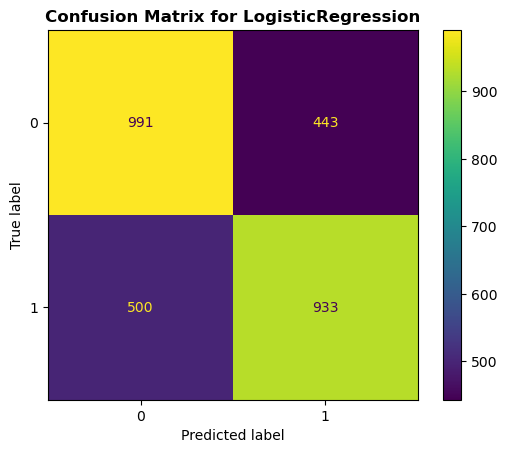

.......................................................


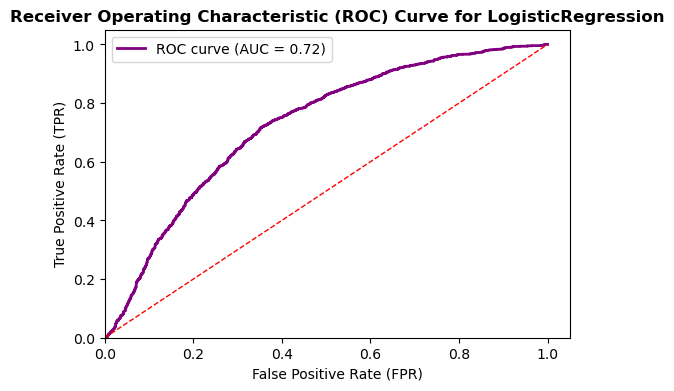

Note for AUC: A higher AUC indicates better performance.
.......................................................


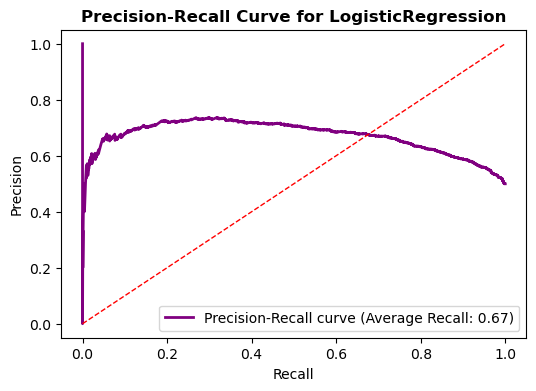

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [160]:
evaluate_model(tuned_lr, y_val_lr, y_val_pred_lr, y_val_prob_lr)

#### eXtreme Gradient Boosting Classifier

<Figure size 500x500 with 0 Axes>

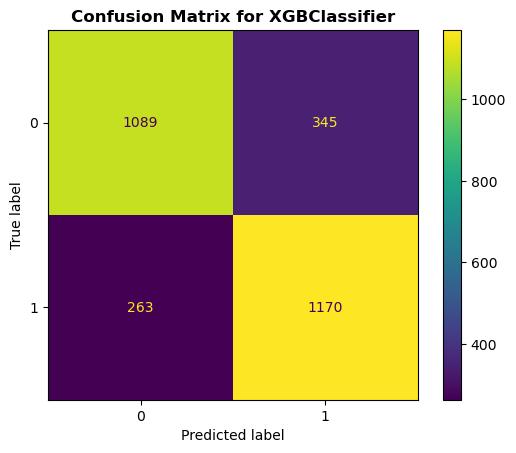

.......................................................


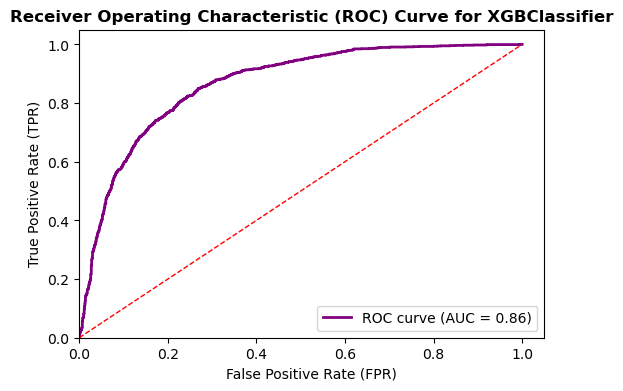

Note for AUC: A higher AUC indicates better performance.
.......................................................


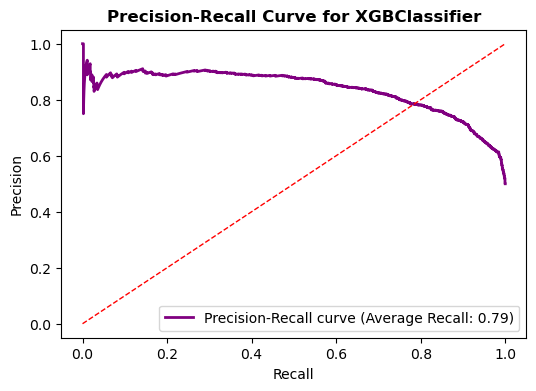

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [163]:
evaluate_model(tuned_xgb, y_val_xgb, y_val_pred_xgb, y_val_prob_xgb)

#### K-Nearest Neighbours (KNN) Classifier

<Figure size 500x500 with 0 Axes>

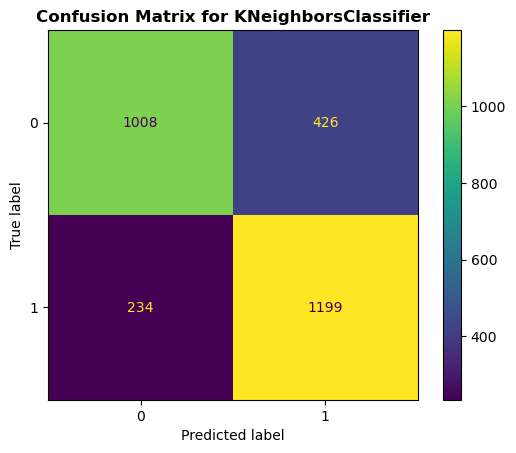

.......................................................


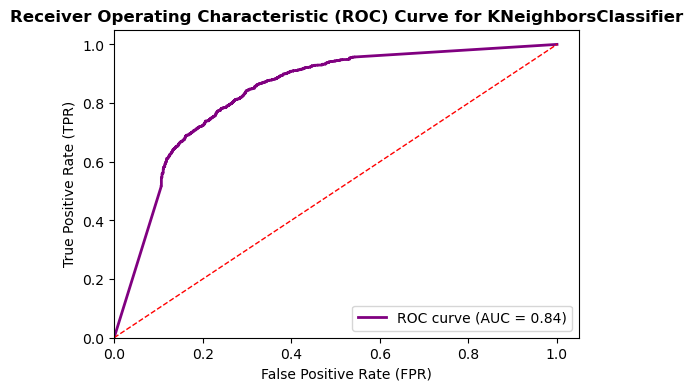

Note for AUC: A higher AUC indicates better performance.
.......................................................


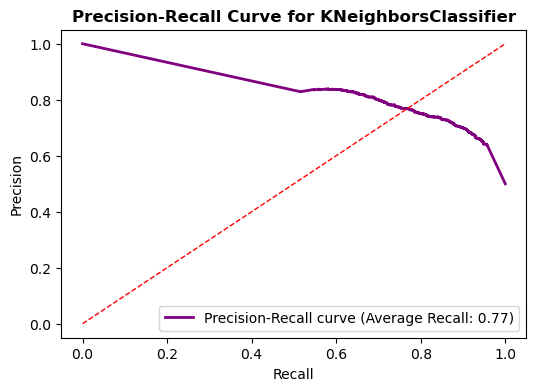

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [166]:
evaluate_model(tuned_knn, y_val_knn, y_val_pred_knn, y_val_prob_knn)

#### Naive Bayes Classifier

<Figure size 500x500 with 0 Axes>

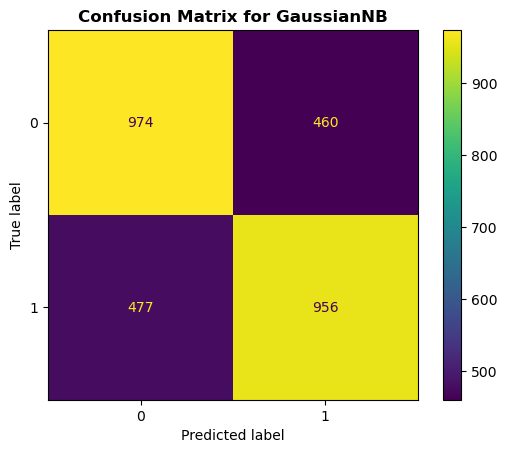

.......................................................


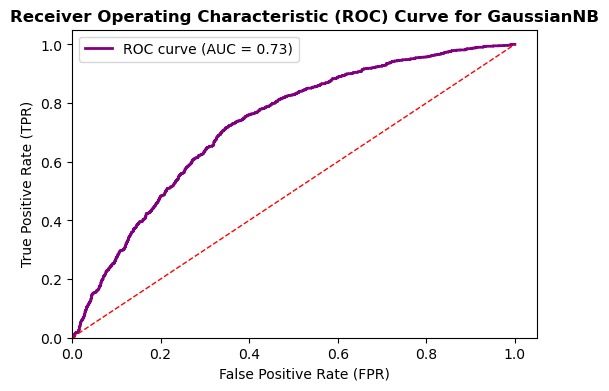

Note for AUC: A higher AUC indicates better performance.
.......................................................


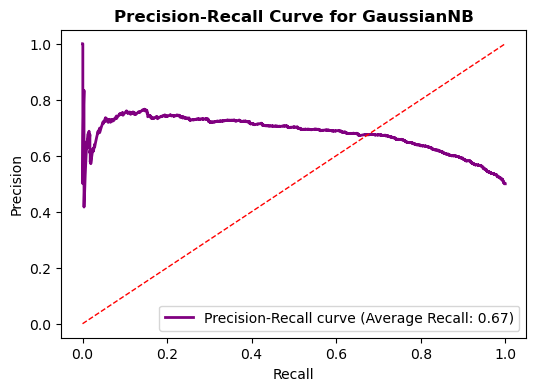

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [169]:
evaluate_model(tuned_nb, y_val_nb, y_val_pred_nb, y_val_prob_nb)

#### Random Forest Classifier (Bagging based)

<Figure size 500x500 with 0 Axes>

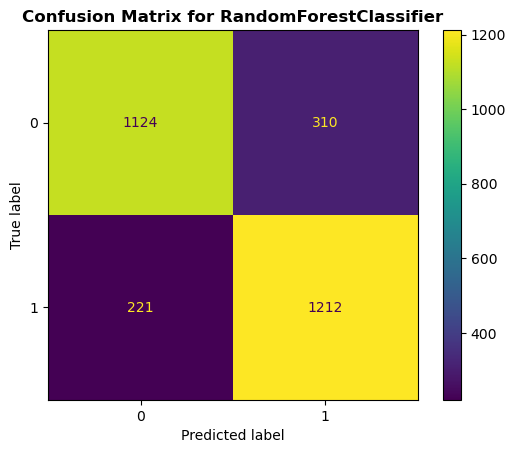

.......................................................


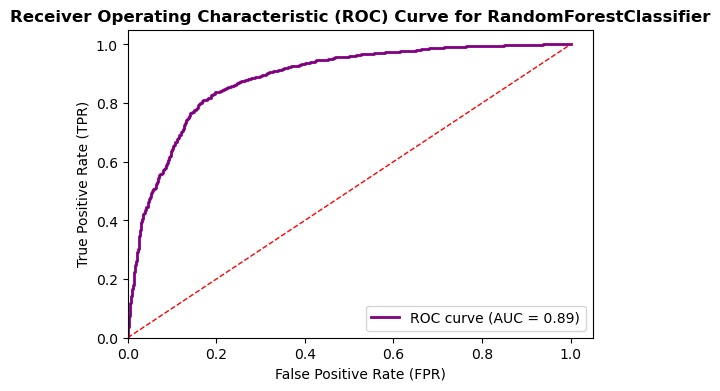

Note for AUC: A higher AUC indicates better performance.
.......................................................


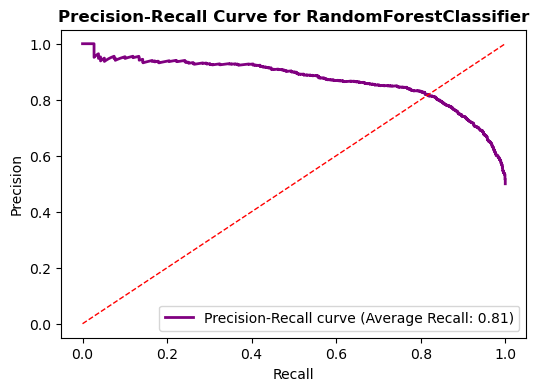

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [172]:
evaluate_model(tuned_rf, y_val_rf, y_val_pred_rf, y_val_prob_rf)

#### Light Gradient Boosting Machine Classifier (Boosting based)

<Figure size 500x500 with 0 Axes>

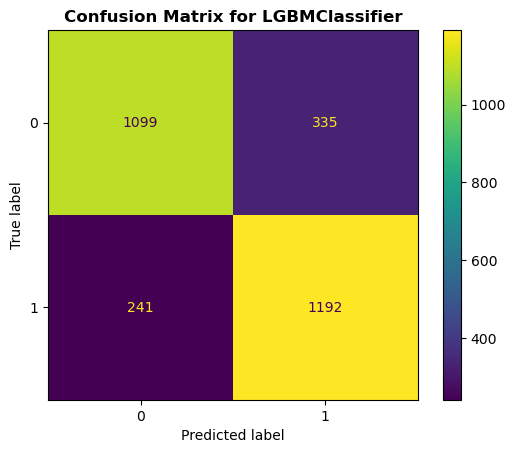

.......................................................


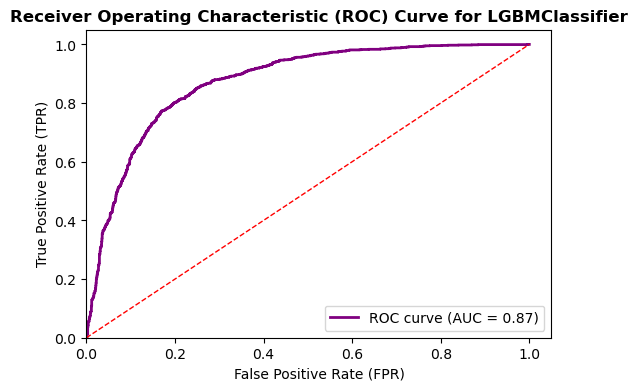

Note for AUC: A higher AUC indicates better performance.
.......................................................


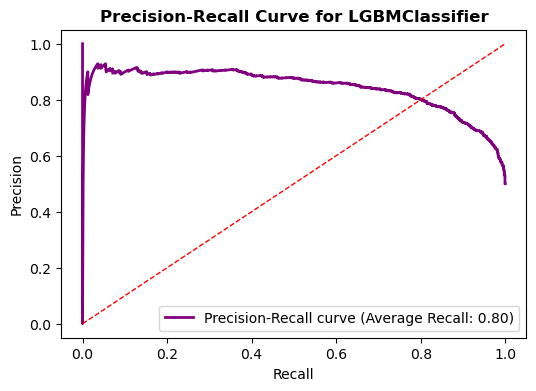

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [175]:
evaluate_model(tuned_lgb, y_val_lgb, y_val_pred_lgb, y_val_prob_lgb)

#### Support Vector Machines (SVMs) Classifier

<Figure size 500x500 with 0 Axes>

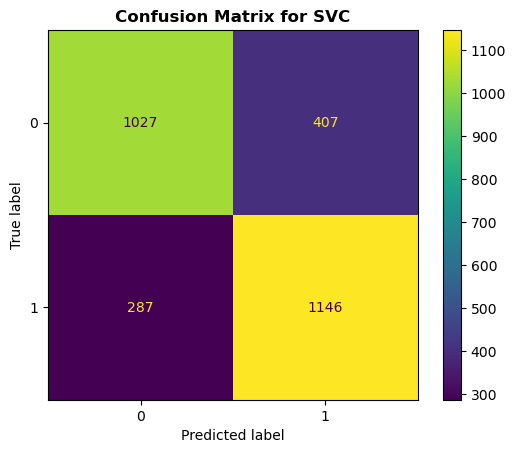

.......................................................


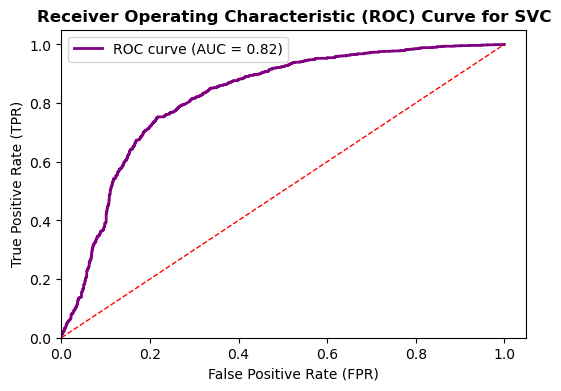

Note for AUC: A higher AUC indicates better performance.
.......................................................


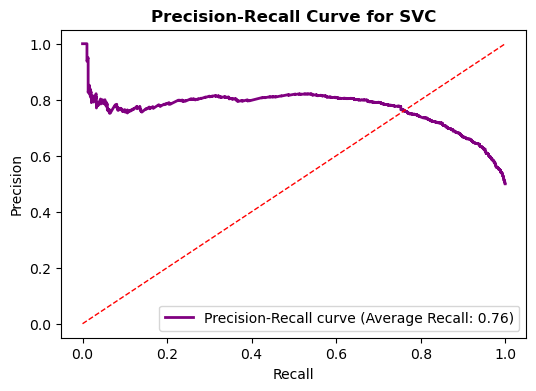

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [230]:
evaluate_model(tuned_svc, y_val_svc, y_val_pred_svc, y_val_prob_svc)

#### Observation:
- **XGBoost, Random Forest** and **Light Gradient Boosting Machine** models performed very well on both classes and achieved ROC scores exceeding 85%.

# Stage 4: MODEL TESTING <a id="section-five"></a>
#### Objectives:
- Creating functions for model testing and evaluation.
- Testing the models.

### Function for model testing and evaluation

In [185]:
#Model evaluation
def evaluate_test_model(trained_model, X_test, y_test):
  
  #Calculating the predictions and probabilities.
  y_test_pred = trained_model.predict(X_test)
  y_test_prob = trained_model.predict_proba(X_test)[:, 1]
  
  #Statistical Results for the test set
  print("TEST SET RESULTS:")
  print("." * 55)
  print(f"Classification Report:\n{metrics.classification_report(y_test, y_test_pred)}")
  print("." * 55)
  print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}")
  print(f"Precision: {metrics.precision_score(y_test, y_test_pred):.2f}")
  print(f"Recall: {metrics.recall_score(y_test, y_test_pred):.2f}")
  print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_test, y_test_pred):.2f}")
  print("." * 55)
  print("\n")
    
   #Confusion Matrix for the test set
  cm = metrics.confusion_matrix(y_test, y_test_pred)
  plt.figure(figsize=(5,5))
  cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
  cm_plot.plot()
  plt.title(f'Confusion Matrix for {type(trained_model).__name__} Classifier', fontweight='bold')
  plt.show()
  
  return None

### Testing the models
Variables to be used:
- X: "X_test_pca"
- y: "y_test"

#### Logistic Regression Classifier

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       796
           1       0.37      0.71      0.48       204

    accuracy                           0.69      1000
   macro avg       0.63      0.70      0.63      1000
weighted avg       0.79      0.69      0.72      1000

.......................................................
Accuracy: 0.69
Precision: 0.37
Recall: 0.71
F1 Score (Harmonic mean of precision and recall): 0.48
.......................................................




<Figure size 500x500 with 0 Axes>

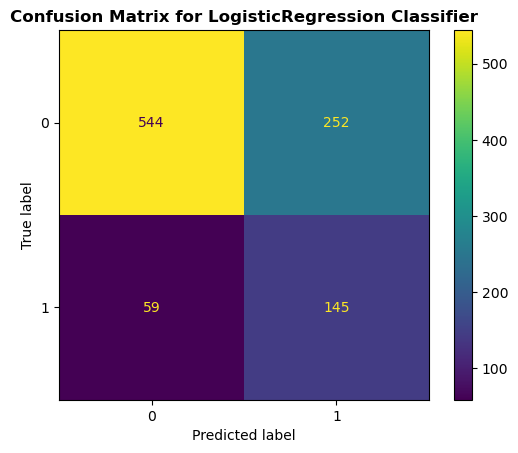

In [206]:
evaluate_test_model(tuned_lr, X_test_pca, y_test)

#### eXtreme Gradient Boosting Classifier

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       796
           1       0.37      0.60      0.46       204

    accuracy                           0.71      1000
   macro avg       0.63      0.67      0.63      1000
weighted avg       0.78      0.71      0.73      1000

.......................................................
Accuracy: 0.71
Precision: 0.37
Recall: 0.60
F1 Score (Harmonic mean of precision and recall): 0.46
.......................................................




<Figure size 500x500 with 0 Axes>

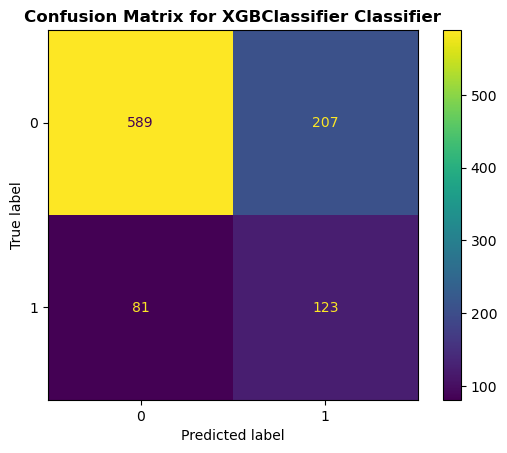

In [226]:
evaluate_test_model(tuned_xgb, X_test_pca, y_test)

#### K-Nearest Neighbours (KNN) Classifier

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       796
           1       0.32      0.54      0.40       204

    accuracy                           0.67      1000
   macro avg       0.59      0.62      0.58      1000
weighted avg       0.75      0.67      0.69      1000

.......................................................
Accuracy: 0.67
Precision: 0.32
Recall: 0.54
F1 Score (Harmonic mean of precision and recall): 0.40
.......................................................




<Figure size 500x500 with 0 Axes>

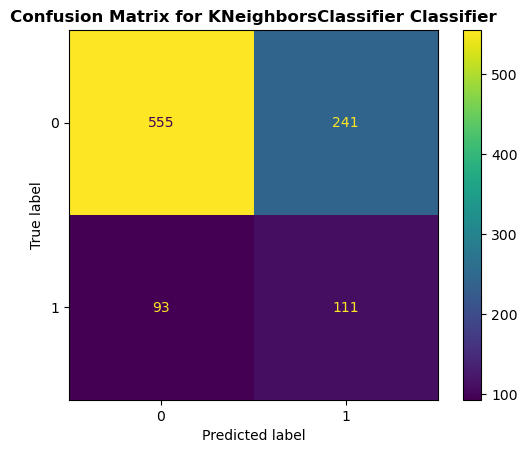

In [210]:
evaluate_test_model(tuned_knn, X_test_pca, y_test)

#### Naive Bayes Classifier

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       796
           1       0.35      0.73      0.48       204

    accuracy                           0.67      1000
   macro avg       0.63      0.69      0.62      1000
weighted avg       0.79      0.67      0.70      1000

.......................................................
Accuracy: 0.67
Precision: 0.35
Recall: 0.73
F1 Score (Harmonic mean of precision and recall): 0.48
.......................................................




<Figure size 500x500 with 0 Axes>

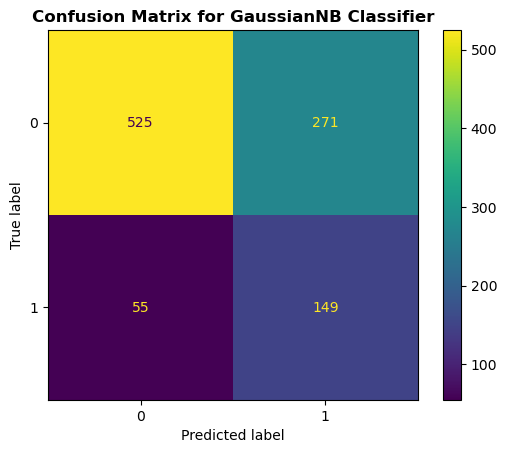

In [213]:
evaluate_test_model(tuned_nb, X_test_pca, y_test)

#### Random Forest Classifier (Bagging based)

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       796
           1       0.40      0.61      0.48       204

    accuracy                           0.73      1000
   macro avg       0.64      0.69      0.65      1000
weighted avg       0.79      0.73      0.75      1000

.......................................................
Accuracy: 0.73
Precision: 0.40
Recall: 0.61
F1 Score (Harmonic mean of precision and recall): 0.48
.......................................................




<Figure size 500x500 with 0 Axes>

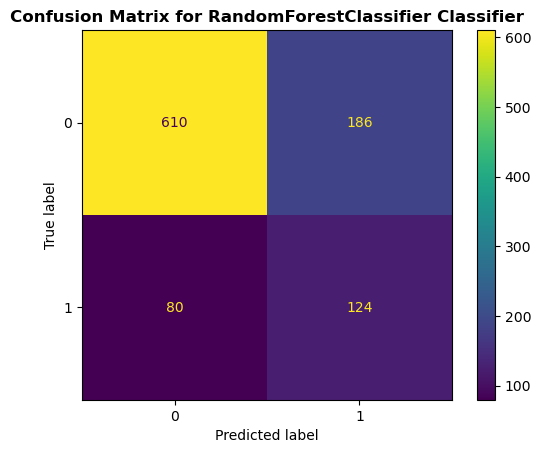

In [216]:
evaluate_test_model(tuned_rf, X_test_pca, y_test)

#### Light Gradient Boosting Machine Classifier (Boosting based)

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80       796
           1       0.36      0.59      0.45       204

    accuracy                           0.70      1000
   macro avg       0.62      0.66      0.62      1000
weighted avg       0.77      0.70      0.72      1000

.......................................................
Accuracy: 0.70
Precision: 0.36
Recall: 0.59
F1 Score (Harmonic mean of precision and recall): 0.45
.......................................................




<Figure size 500x500 with 0 Axes>

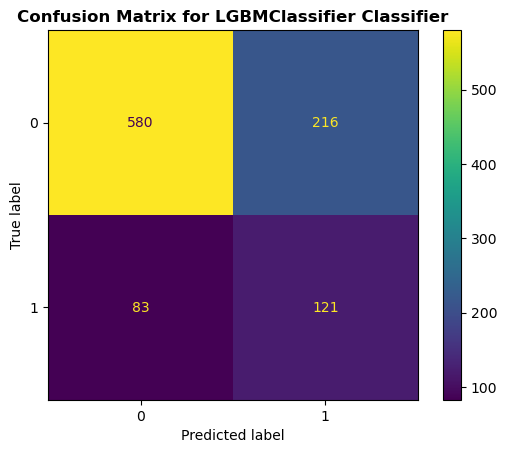

In [219]:
evaluate_test_model(tuned_lgb, X_test_pca, y_test)

#### Support Vector Machines (SVMs) Classifier

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       796
           1       0.35      0.56      0.43       204

    accuracy                           0.70      1000
   macro avg       0.61      0.65      0.61      1000
weighted avg       0.76      0.70      0.72      1000

.......................................................
Accuracy: 0.70
Precision: 0.35
Recall: 0.56
F1 Score (Harmonic mean of precision and recall): 0.43
.......................................................




<Figure size 500x500 with 0 Axes>

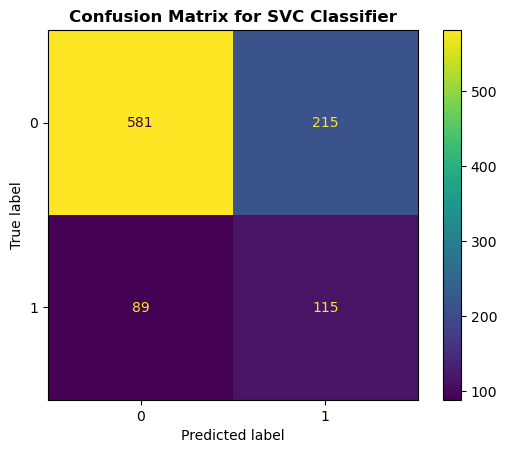

In [229]:
evaluate_test_model(tuned_svc, X_test_pca, y_test)

CHurn
- Logistic: 0.71
- XGBClassifier(): 0.60
- knn: 0.54
- nb: 0.73
- rf: 0.61
- lgbm: 0.59
- svc: 0.56


# Conclusion <a id="bye"></a>
Based on the the metrics from the evaluation of multiple models, I have selected **Random Forest Classifier** as the final model. While several models performed similarly, Logistic Regression, along with Naive Bayes and Random Forest, provided the most balanced performance. 

<center> - Thank You - </center?